# Cvičení 10

Uvažujme problém hledání vlastních čísel čtvercové $n \times n$ matice $A$ jako lineární transformaci $Av = \lambda v$, kde $\lambda$ je vlastní číslo matice $A$ a $v$ vlastní vektor odpovídající vlastnímu číslu $\lambda$.  
## Mocninná metoda

Mocninná metoda řeší tzv. částečný problém vlastních čísel - hledá největší vlastní číslo v absolutní hodnotě.

Pro dominantní vlastní číslo $\lambda_n$ platí
$ |\lambda_n| > |\lambda_{n-1}| \geq \ldots \geq |\lambda_1|.$
Vlastní vektor odpovídající dominantnímu vlastnímu číslu se nazývá dominantní vlastní vektor.

Dále také platí: je-li $x$ vlastní vektor reálné symetrické matice $A$, pak odpovídající vlastní číslo je dáno výrazem 
$$\lambda = \frac{(Ax)^Tx}{x^Tx} = \frac{x^TAx}{x^Tx} = \frac{x^TAx}{\|x\|^2} = (q^k)^TAq^k, \ \textrm{kde} \ \ q^k = \frac{x^k}{\| x^k \|}. $$

Výraz $\frac{x^TAx}{x^Tx}$ bývá označován jako Rayleighův podíl (Rayleigho koeficient) a používá se pro hledání odhadů pro nejmenší, resp. největší, vlastní číslo matic.

### Příklad 1

Doplňte správné řešení Mocninné metody (anglicky Power method) do buňky níže dle následujícího algoritmu: 

$$
\begin{array}{l}
\text{Input: SPD matrix } A, \text{ initial approximation } x_0, \text{ maximum number of iterations max\_it.}\\
q^0 = \frac{x^0}{\| x^0 \|}  \\
\text{\bf{for} }  k = 1, 2, \ldots, max\_it \\
\quad\begin{array}{l}
    x^k = A q^{k-1} \\
    q^k = \frac{x^k}{\| x^k \|} \\ 
    \lambda = (q^k)^TAq^k \\
    k = k + 1 \\
\end{array}\\
\text{end for}\\
\text{The solution is stored in } \lambda.\\
\end{array}
$$

Jako ukončovací podmínku volíme buď předepsaný počet iterací $max\_it$ nebo sledujeme normu vektoru $Aq_k - \lambda q_k$, která by se měla blížit nule pro $k \rightarrow \infty$.

In [1]:
import numpy as np

def power_method(A, x0, max_it=100, tol=1e-10, use_residual_stop=True):
    """
    Mocninná metoda pro hledání největšího vlastního čísla SPD matice A.

    Parametry:
    - A: SPD matice (symetrická, pozitivně definitní)
    - x0: počáteční vektor
    - max_it: maximální počet iterací
    - tol: tolerance pro reziduální ukončení
    - use_residual_stop: pokud True, metoda zastaví při malé normě rezidua

    Návratové hodnoty:
    - lambda_k: aproximace největšího vlastního čísla
    - q: odpovídající vlastní vektor
    - k: počet provedených iterací
    """
    # vypočtěte počáteční hodnotu q:
    q = x0 / np.linalg.norm(x0)

    for k in range(1, max_it + 1):
        # vypočtěte x:
        x = A @ q
        # vypočtěte novou hodnotu q:
        q = x / np.linalg.norm(x)
        # vypočtěte hodnotu lambda:
        lambda_k = q.T @ A @ q

        if use_residual_stop:
            residual = np.linalg.norm(A @ q - lambda_k * q)
            if residual < tol:
                break

    return lambda_k, q, k


In [2]:
# Zde otestujeme vaši funkci
# Testovací SPD matice
np.random.seed(42)
A = np.random.rand(5, 5)
A = A @ A.T  # SPD matice (symetrická a pozitivně definitní)

# Počáteční vektor
x0 = np.random.rand(5)

# Spuštění metody
lambda_approx, _, iters = power_method(A, x0, max_it=100)

print(f"Aproximované největší vlastní číslo: {lambda_approx}")
print(f"Počet iterací: {iters}")


Aproximované největší vlastní číslo: 5.529699859223832
Počet iterací: 14


In [14]:
A = np.array([[4, 3, 3, 2],
              [3, 6, 3, 2],
              [3, 3, 4, 2],
              [2, 2, 2, 2]])
x0 = np.array([1, 1, 1, 1])
lambda_approx, _, iters = power_method(A, x0)
print(lambda_approx)

11.963380807588676


### Příklad 2

Upravte výše uvedený kód, aby uchovával historii hodnot v jednotlivých iteracích a přidejte ověření správnosti výpočtu vůči knihovní funkci Pythonu eigh. S pomocí historie vykreslete následující grafy: 

1.) závislost hodnoty vlastního čísla na iteraci, 

2.) závislost chyby řešení (ve srovnání se řešením pomocí knihovní funkce eigh) na iteraci. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def power_method_history(A, x0, max_it=100, tol=1e-10, use_residual_stop=True):
    """
    Mocninná metoda pro hledání největšího vlastního čísla SPD matice A.

    Parametry:
    - A: SPD matice (symetrická, pozitivně definitní)
    - x0: počáteční vektor
    - max_it: maximální počet iterací
    - tol: tolerance pro reziduální ukončení
    - use_residual_stop: pokud True, metoda zastaví při malé normě rezidua

    Návratové hodnoty:
    - lambda_k: aproximace největšího vlastního čísla
    - q: odpovídající vlastní vektor
    - k: počet provedených iterací
    - lambdas: historie aproximací vlastního čísla
    """
 
    # vypočtěte počáteční hodnotu q:       
    q = x0 / np.linalg.norm(x0)
    # vytvořte seznam pro ukládání hodnot vlastního čísla:
    lambdas = []

    for k in range(1, max_it + 1):
        # vypočtěte x:
        x = A @ q
        # vypočtěte novou hodnotu q:
        q = x / np.linalg.norm(x)
        # vypočtěte hodnotu lambda:
        lambda_k = q.T @ A @ q
        # přidejte hodnotu lambda_k do historie:
        lambdas.append(lambda_k)

        if use_residual_stop:
            residual = np.linalg.norm(A @ q - lambda_k * q)
            if residual < tol:
                break

    return lambda_k, q, k, lambdas

In [4]:
# Zde otestujeme vaši funkci
# --- Testovací SPD matice ---
np.random.seed(100)
A = np.random.rand(5, 5)
A = A @ A.T  # SPD matice

x0 = np.random.rand(5)

# --- Spuštění metody ---
lambda_approx, _, iters, lambda_hist = power_method_history(A, x0, max_it=50)

# --- Ověření správnosti ---
eigvals, _ = np.linalg.eigh(A) # np.linalg.eigvalsh(A)
lambda_true = eigvals[-1]  # největší vlastní číslo

print(f"Mocninná metoda:    λ ≈ {lambda_approx:.10f} (v {iters} iteracích)")
print(f"Numpy eigh:         λ = {lambda_true:.10f}")
print(f"Absolutní chyba:    {abs(lambda_true - lambda_approx):.2e}")


Mocninná metoda:    λ ≈ 6.2385875699 (v 15 iteracích)
Numpy eigh:         λ = 6.2385875699
Absolutní chyba:    1.78e-15


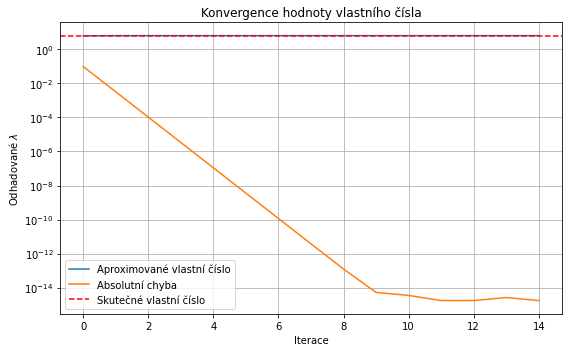

In [13]:
# --- Vykreslení konvergence ---
plt.figure(figsize=(8, 5))
plt.plot(range(iters), lambda_hist, label="Aproximované vlastní číslo") # doplňte kód pro vykreslení konvergence
plt.plot(range(iters), lambda_true - lambda_hist, label="Absolutní chyba")
plt.axhline(y=lambda_true, color='red', linestyle='--', label='Skutečné vlastní číslo')
plt.title("Konvergence hodnoty vlastního čísla")
plt.yscale("log")
plt.xlabel("Iterace")
plt.ylabel("Odhadované $\lambda$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# --- Výpočet chyb v každé iteraci ---
errors = [abs(lam - lambda_true) for lam in lambda_hist]

# --- Vykreslení grafu chyby ---
plt.figure(figsize=(8, 5))
plt.semilogy # doplňte kód pro vykreslení chyby
plt.title("Konvergence chyby řešení (absolutní chyba vs. iterace)")
plt.xlabel("Iterace")
plt.ylabel(r"$|\lambda_k - \lambda_{\mathrm{true}}|$")
plt.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.show()